<a href="https://colab.research.google.com/github/carlosherediapimienta/Collaboration_CIEMAT/blob/main/U_235.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## U-235 Experimento:

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv("Exp_U235.csv", sep=";")  # Asumiendo que el archivo está separado por tabulaciones

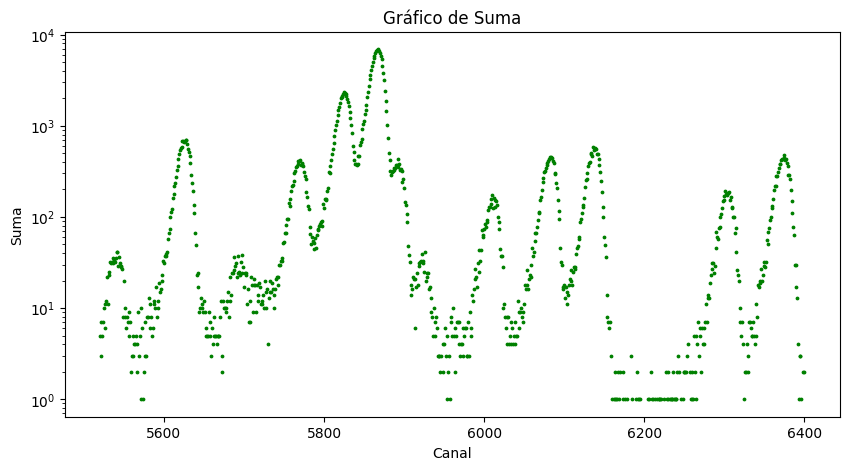

In [163]:
# Seleccionar las columnas HR01, HR02 y Suma
df_selected = df[['HR01', 'HR02', 'Suma']]

# Definir el rango deseado en el eje X
inicio = 5520
fin = 6400

# Filtrar el DataFrame para incluir solo las filas dentro del rango
df_selected = df_selected[(df_selected.index >= inicio) & (df_selected.index <= fin)]

# Graficar Suma en un eje X separado
plt.figure(figsize=(10, 5))
plt.scatter(df_selected.index, df_selected['Suma'], s=3, color='green')
plt.xlabel('Canal')
plt.ylabel('Suma')
plt.title('Gráfico de Suma')
plt.yscale('log')

plt.show()

In [164]:
fig = px.line(df_selected, x=df_selected.index, y='Suma', labels={'index': 'Canal', 'Suma': 'Suma'},
              title='Gráfico de Suma', log_y=True, width=800, height=500)

fig.update_traces(line=dict(color='green'))

fig.update_layout(yaxis_tickformat="e")  # Configurar el eje y en notación científica con un solo dígito después del punto decimal

fig.show()

# U-235 Simulation Penhan

In [119]:
df_penhan = pd.read_csv('/content/chspect-U235.dat',
                   delim_whitespace=True,
                   skiprows=5, names=['Deposited Energy (eV)',
                          'Probability Density (1/(eV*particle))'])

In [120]:
df_penhan_U235 = df_penhan[(df_penhan['Deposited Energy (eV)'] >= 4.135E6) & (df_penhan['Deposited Energy (eV)'] <= 4.605E6)].copy()
df_penhan_U235.loc[:, 'Probability Density (1/(eV*particle))'] *= 0.95

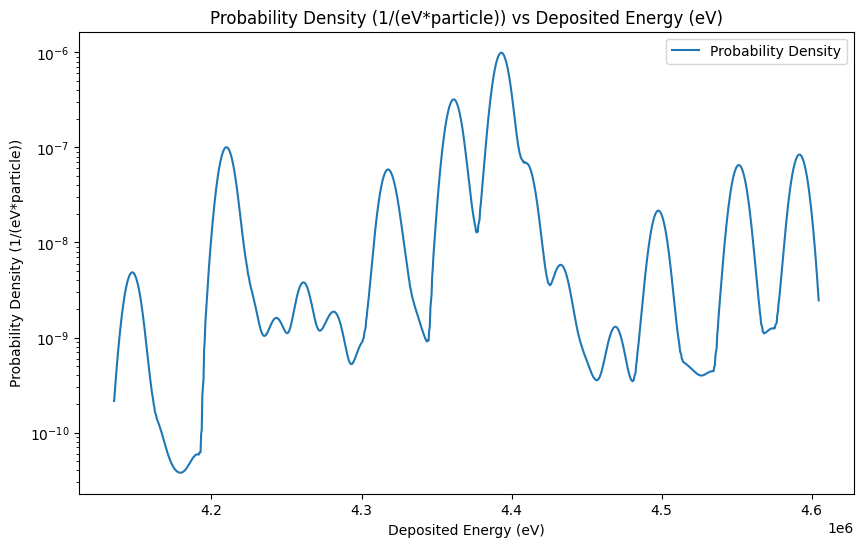

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(df_penhan_U235['Deposited Energy (eV)'], df_penhan_U235['Probability Density (1/(eV*particle))'], label='Probability Density')
plt.xlabel('Deposited Energy (eV)')
plt.ylabel('Probability Density (1/(eV*particle))')
plt.title('Probability Density (1/(eV*particle))' + ' vs Deposited Energy (eV)')
plt.yscale('log')
plt.legend()
plt.show()

# U-234 Simulation Penhan

In [122]:
df_penhan = pd.read_csv('/content/chspect-U234.dat',
                   delim_whitespace=True,
                   skiprows=5, names=['Deposited Energy (eV)',
                          'Probability Density (1/(eV*particle))'])

In [123]:
df_penhan_U234 = df_penhan[(df_penhan['Deposited Energy (eV)'] >= 4.7E6) & (df_penhan['Deposited Energy (eV)'] <= 4.787E6)].copy()
df_penhan_U234.loc[:, 'Probability Density (1/(eV*particle))'] *= 0.05

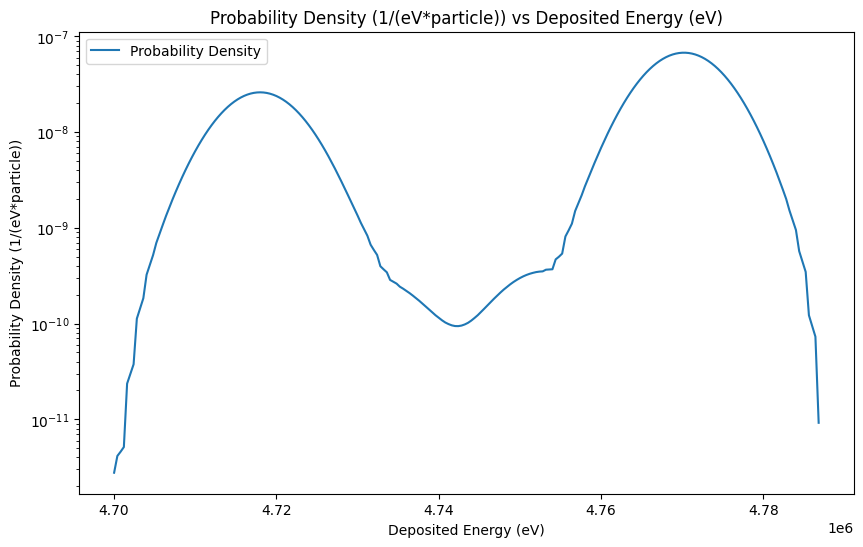

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(df_penhan_U234['Deposited Energy (eV)'], df_penhan_U234['Probability Density (1/(eV*particle))'], label='Probability Density')
plt.xlabel('Deposited Energy (eV)')
plt.ylabel('Probability Density (1/(eV*particle))')
plt.title('Probability Density (1/(eV*particle))' + ' vs Deposited Energy (eV)')
plt.yscale('log')
plt.legend()
plt.show()

# Merge U-235 and U-234

In [125]:
df_penhan_concat = pd.concat([df_penhan_U234, df_penhan_U235], ignore_index=True)

In [126]:
df_penhan= df_penhan_concat[df_penhan_concat['Probability Density (1/(eV*particle))'] >= 1.0E-10].copy()

In [184]:
import plotly.express as px

fig = px.scatter(df_penhan, x='Deposited Energy (eV)', y='Probability Density (1/(eV*particle))',
                 labels={'Deposited Energy (eV)': 'Deposited Energy (eV)',
                         'Probability Density (1/(eV*particle))': 'Probability Density (1/(eV*particle))'},
                 title='Probability Density (1/(eV*particle)) vs Deposited Energy (eV)',
                 log_y=True, # Escala logarítmica en el eje y
                 width=800, height=500)

fig.update_traces(marker=dict(size=10),
                  selector=dict(mode='markers'))

fig.update_layout(yaxis_tickformat="e")

fig.show()

# Linear regression for U-235(4)

In [185]:
ax = 741.929
bx = 40201.8

ay = 1.43534e-10
by = -1.03367e-9

df_selected['Index Predicted'] = bx + ax * df_selected.index
df_selected['Probability Predicted'] = by + ay * df_selected['Suma']

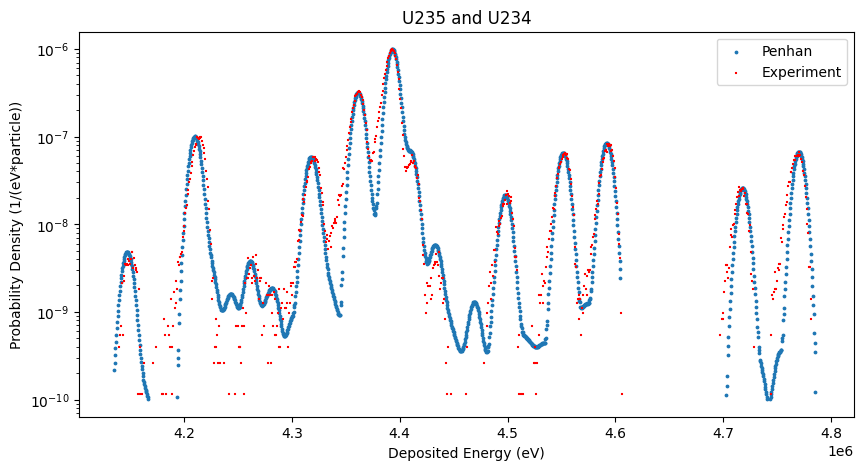

In [197]:
# Graficar Suma en un eje X separado
plt.figure(figsize=(10, 5))
plt.scatter(df_penhan['Deposited Energy (eV)'], df_penhan['Probability Density (1/(eV*particle))'], s= 3, marker ='o', label='Penhan')
plt.scatter(df_selected['Index Predicted'], df_selected['Probability Predicted'], s= 4, marker='+', color='red', label='Experiment')
plt.title('U235 and U234')
plt.xlabel('Deposited Energy (eV)')
plt.ylabel('Probability Density (1/(eV*particle))')
plt.yscale('log')
plt.legend()
plt.show()